In [18]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench.util import ema_logging
from ema_workbench import load_results
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

# Base case: Total IJssel area
In this part, the base case of the total IJssel area (i.e. all the dike rings combined) are presented.

In [19]:
load_file_name1 ='results/4000  base scenarios policy pf 1.tar.gz'
experiments1, outcomes1 = load_results(load_file_name1)
df_outcomes1 = pd.DataFrame(outcomes1)

[MainProcess/INFO] results loaded successfully from C:\Users\larsh\OneDrive - Delft University of Technology\Documenten\TU\MSc Construction Management and Engineering\MSc CME Q4\EPA1361 - Model-based Decision Making\final assignment\results\4000  base scenarios policy pf 1.tar.gz


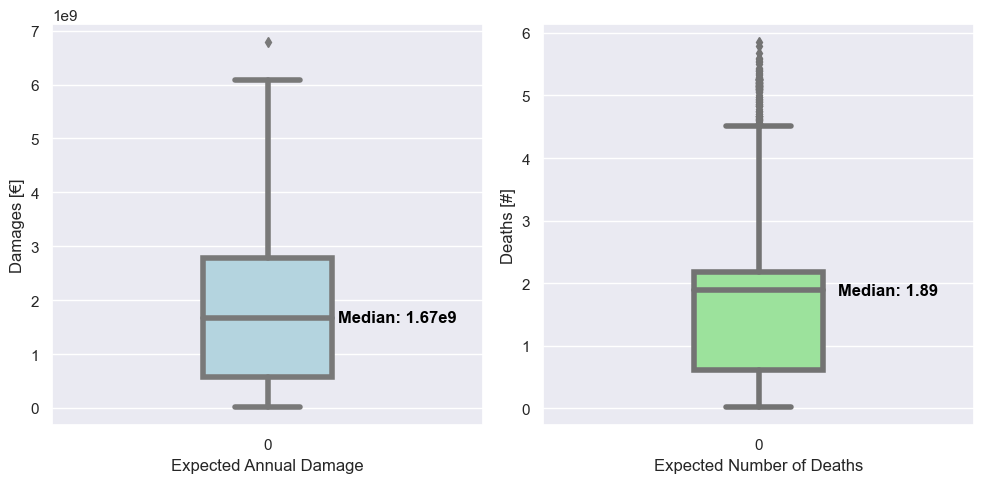

In [20]:
sns.set(font_scale=1)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(df_outcomes1['Expected Annual Damage'], width=0.3, ax=ax[0], linewidth=4, color='lightblue')
plt.xlabel('Expected Annual Damage')
plt.ylabel('Damages [€]')
median1 = df_outcomes1['Expected Annual Damage'].median()
ax[0].text(0.3, median1, f'Median: {median1/1e9:.2f}e9', ha='center', va='center', color='black', weight='bold')


plt.subplot(1,2,2)
sns.boxplot(df_outcomes1['Expected Number of Deaths'], width=0.3, ax=ax[1], linewidth=4, color='lightgreen')
plt.xlabel('Expected Number of Deaths')
plt.ylabel('Deaths [#]')
median2 = df_outcomes1['Expected Number of Deaths'].median()
ax[1].text(0.3, median2, f'Median: {median2:.2f}', ha='center', va='center', color='black', weight='bold')

plt.tight_layout()
plt.show()

In [21]:
left_median = df_outcomes1['Expected Annual Damage'].median()
left_first_quartile = df_outcomes1['Expected Annual Damage'].quantile(0.25)
left_third_quartile = df_outcomes1['Expected Annual Damage'].quantile(0.75)
print("Expected Annual Damages:")
print("Median:", left_median)
print("First Quartile:", left_first_quartile)
print("Third Quartile:", left_third_quartile)
print()

right_median = df_outcomes1['Expected Number of Deaths'].median()
right_first_quartile = df_outcomes1['Expected Number of Deaths'].quantile(0.25)
right_third_quartile = df_outcomes1['Expected Number of Deaths'].quantile(0.75)
print("Expected Number of Deaths:")
print("Median:", right_median)
print("First Quartile:", right_first_quartile)
print("Third Quartile:", right_third_quartile)

Expected Annual Damages:
Median: 1672751088.7412832
First Quartile: 568976644.6510079
Third Quartile: 2782379084.9562283

Expected Number of Deaths:
Median: 1.8860877853542726
First Quartile: 0.6075028587231
Third Quartile: 2.176061271187402


# Base case: Each dike ring individually
In this part of the code, the results are presented for each of the dike rings seperately.

In [22]:
load_file_name2 ='results/4000  base scenarios policy pf 3.tar.gz'
experiments2, outcomes2 = load_results(load_file_name2)
df_outcomes2 = pd.DataFrame(outcomes2)

[MainProcess/INFO] results loaded successfully from C:\Users\larsh\OneDrive - Delft University of Technology\Documenten\TU\MSc Construction Management and Engineering\MSc CME Q4\EPA1361 - Model-based Decision Making\final assignment\results\4000  base scenarios policy pf 3.tar.gz


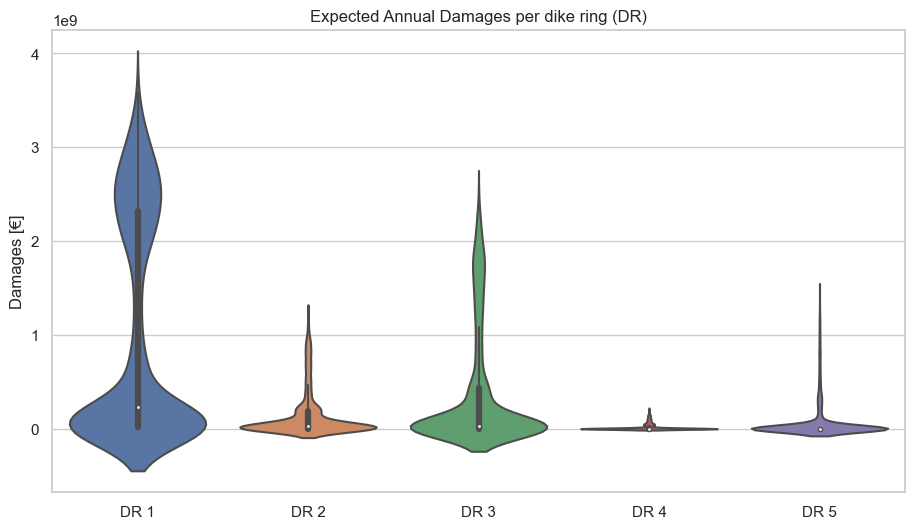

In [23]:
sns.set_theme(style="whitegrid")

columns_costs = ['A.1 Total Costs', 'A.2 Total Costs', 'A.3 Total Costs', 'A.4 Total Costs', 'A.5 Total Costs']
df_costs = df_outcomes2[columns_costs].copy()

fig, ax = plt.subplots(figsize=(11,6))
sns.violinplot(df_costs, scale='width')
ax.set_xticklabels(['DR 1', 'DR 2', 'DR 3', 'DR 4', 'DR 5'])
ax.set_ylabel('Damages [€]')
ax.set_title('Expected Annual Damages per dike ring (DR)');

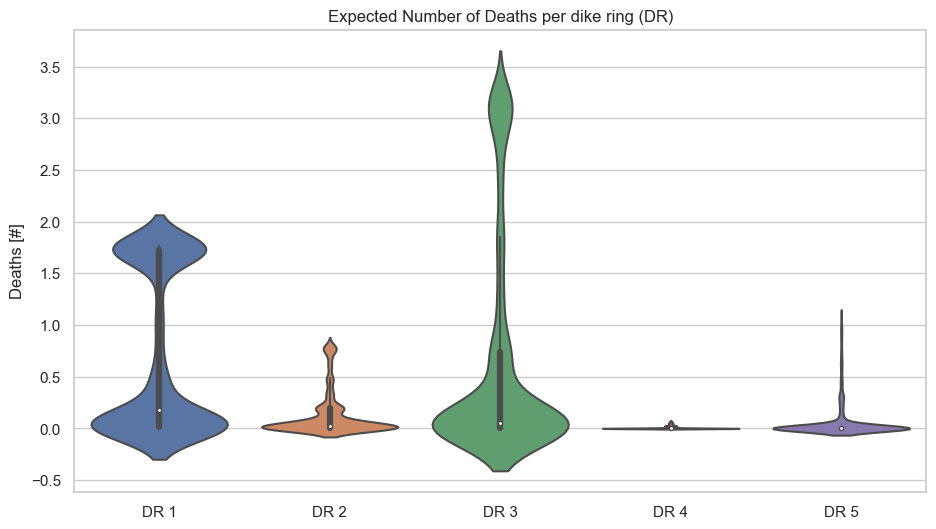

In [24]:
ax.set_title('Expected Annual Damages per dike ring (DR)');
columns_deaths = ['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths',
                  'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths']
df_deaths = df_outcomes2[columns_deaths]

fig, ax = plt.subplots(figsize=(11, 6))
sns.violinplot(df_deaths, scale='width')
ax.set_xticklabels(['DR 1', 'DR 2', 'DR 3', 'DR 4', 'DR 5'])
ax.set_ylabel('Deaths [#]')
ax.set_title('Expected Number of Deaths per dike ring (DR)');

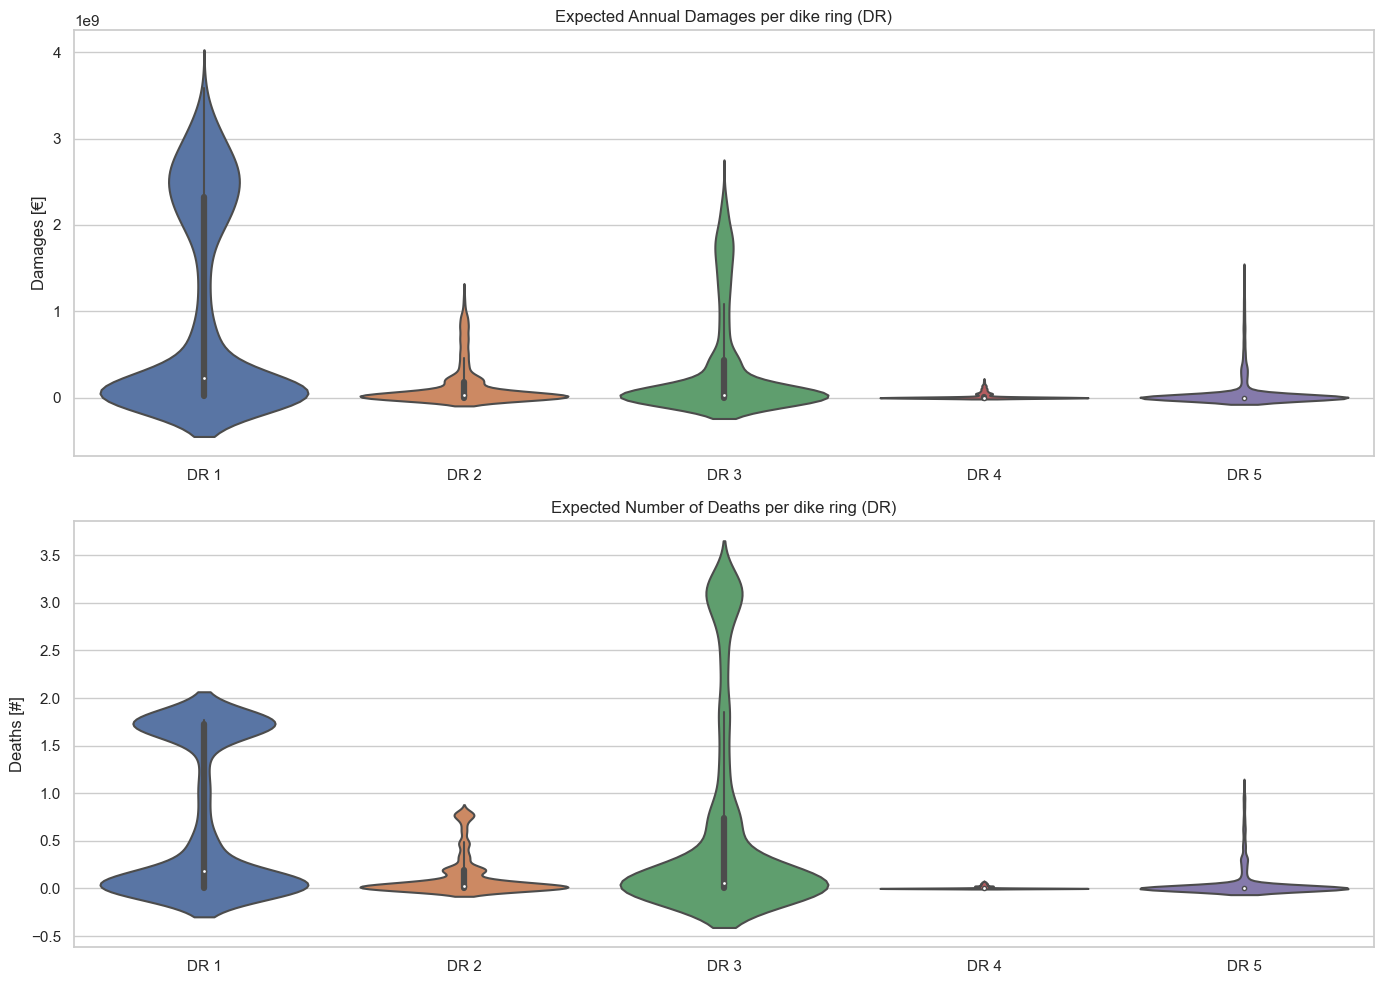

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(14,10))
sns.violinplot(df_costs, scale='width', ax=ax[0])
ax[0].set_xticklabels(['DR 1', 'DR 2', 'DR 3', 'DR 4', 'DR 5'])
ax[0].set_ylabel('Damages [€]')
ax[0].set_title('Expected Annual Damages per dike ring (DR)');

sns.violinplot(df_deaths, scale='width',ax=ax[1])
ax[1].set_xticklabels(['DR 1', 'DR 2', 'DR 3', 'DR 4', 'DR 5'])
ax[1].set_ylabel('Deaths [#]')
ax[1].set_title('Expected Number of Deaths per dike ring (DR)');

plt.tight_layout()